In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append("/Users/massin/Google Drive/Projects/NaiNo-Kami/Py/NnK")
import eew 
import obspy
import matplotlib
from imp import reload

In [3]:
!ssh -fNT -L 5555:192.168.2.8:8080 marn@201.247.177.208

In [4]:
!ssh -fNT -L 18000:192.168.2.8:18000 marn@201.247.177.208

In [3]:
from obspy.clients.fdsn import Client
client = Client("http://192.168.2.8:8080/")#localhost:5555/")#

network = client.get_stations(level='station',
                              maxradius=5,
                              latitude=13.5,
                              longitude=-89)
reload(eew.inventory_addons)
rtnetwork=eew.inventory_addons.slink2inv(network,
                                         slink_server_url='192.168.2.8:18000')#'localhost:18000')

<IPython.core.display.Javascript object>


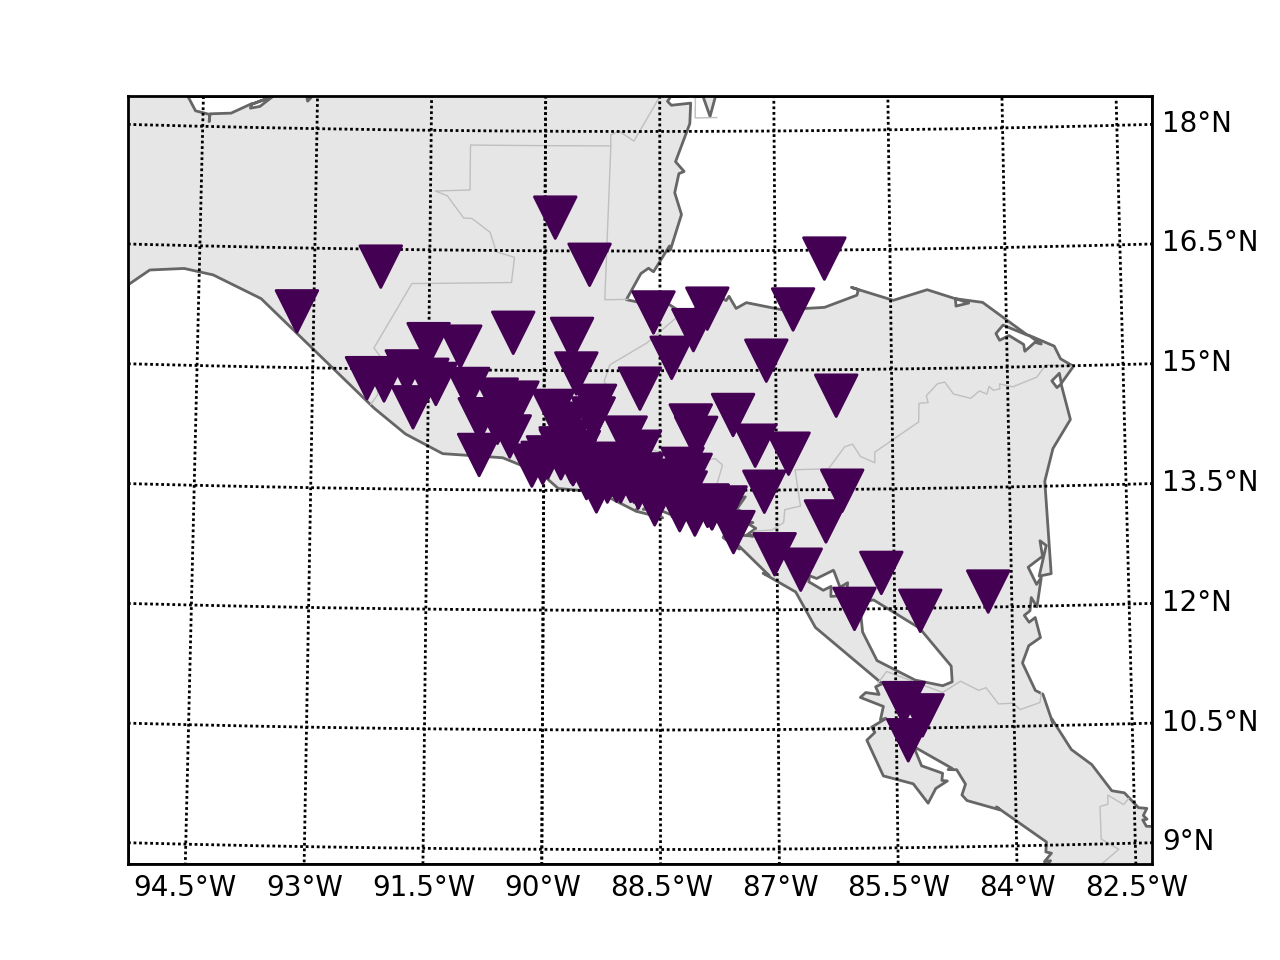

<IPython.core.display.Javascript object>


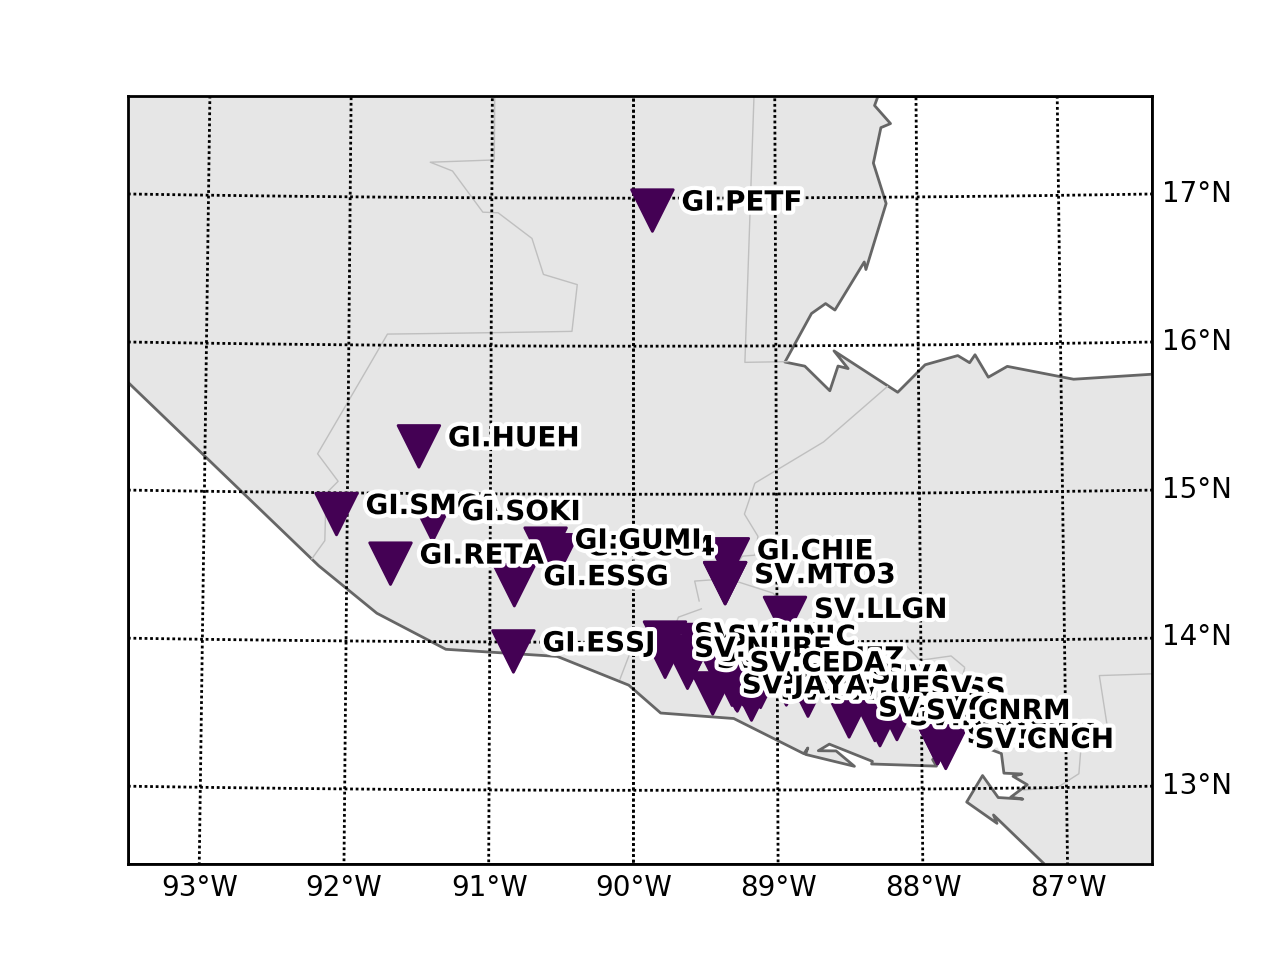

In [4]:
f=network.plot(color=1,projection='local')
f=rtnetwork.plot(color=1,projection='local')

# for distance to 8 stations

In [44]:
from numpy import loadtxt

lines = loadtxt("https://raw.githubusercontent.com/SeisComP3/seiscomp3/master/src/trunk/apps/processing/scautoloc/config/grid.conf")
grid=lines.transpose()

f = eew.inventory_addons.plot_traveltimes(rtnetwork,
                                          grid=grid,
                                          N=range(1,9),
                                          dmin=[8,0,0],
                                          scautolocgridminn=4,
                                          scautolocgridfile='grid-MARN-XXL.conf',
                                          scautolocgrid=True,
                                          depth=10,
                                          plot='none',
                                          teleseism_min_stat=9
                                          )
for i,depth in enumerate([20, 40, 80, 160]):
    print(depth,'grid-MARN-Z%d.conf'%(i))
    f = eew.inventory_addons.plot_traveltimes(rtnetwork,
                                              N=range(1,9),
                                              dmin=[8,0,0],
                                              scautolocgridminn=4,
                                              scautolocgridfile='grid-MARN-Z%d.conf'%(i),
                                              scautolocgrid=True,
                                              depth=depth,
                                              bits=3*1024,
                                              tmax=40.,
                                              plot='none',
                                              mapbounds=[[-88.5-4.5,-79.5-4.5],[7+4.5,14+4.5]],
                                              teleseism_min_stat=9
                                              )

!cat grid-MARN-Z*.conf > grid-MARN.conf
!minmax grid-MARN-XXL.conf
!minmax grid-MARN.conf
!awk '$2<0{print $1,360+$2,$3,$4,$5,$6};$2>0{print $0}' grid-MARN-XXL.conf > tmp.conf
!mv tmp.conf grid-MARN-XXL.conf
!awk '$2<0{print $1,360+$2,$3,$4,$5,$6};$2>0{print $0}' grid-MARN.conf > tmp.conf
!mv tmp.conf grid-MARN.conf
!minmax grid-MARN-XXL.conf
!minmax grid-MARN.conf

scautolocgridfile
20 grid-MARN-Z0.conf
scautolocgridfile
40 grid-MARN-Z1.conf
scautolocgridfile
80 grid-MARN-Z2.conf
scautolocgridfile
160 grid-MARN-Z3.conf
scautolocgridfile
minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-MARN-XXL.conf: N = 2120	<-90/90>	<-177.46/180>	<33/600>	<4/4>	<3.32/176.28>	<9/9>
minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-MARN.conf: N = 12544	<10.37/19.75>	<-94.98/-85>	<20/160>	<0.12/0.12>	<0.16/7.48>	<4/9>
minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-MARN-XXL.conf: N = 2120	<-90/90>	<0/355>	<33/600>	<4/4>	<3.32/176.28>	<9/9>
minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-MARN.conf: N = 12544	<10.37/19.75>	<266/275>	<20/160>	<0.12/0.12>	<0.16/7.48>	<4/9>


In [45]:
!rm grid-MARN-XXL.filtered.conf
!rm grid-MARN-merged.conf
!awk '(($1<10.37 || $1>19.75) && ($2<266 || $2>275)){print $0}' grid-MARN-XXL.conf > grid-MARN-XXL.filtered.conf
!cat grid-MARN-XXL.filtered.conf grid-MARN.conf  > grid-MARN-merged.conf
!wc -l grid-MARN-merged.conf grid-MARN.conf grid-MARN-XXL.conf grid-MARN-XXL.filtered.conf
!scp grid-MARN-merged.conf grid-MARN.conf grid-MARN-XXL.conf marn@192.168.2.244:.seiscomp3/
#marn@201.247.177.208

   14426 grid-MARN-merged.conf
   12544 grid-MARN.conf
    2120 grid-MARN-XXL.conf
    1882 grid-MARN-XXL.filtered.conf
   30972 total
grid-MARN-merged.conf                         100%  390KB   8.9MB/s   00:00    
grid-MARN.conf                                100%  334KB   9.3MB/s   00:00    
grid-MARN-XXL.conf                            100%   63KB   8.6MB/s   00:00    
